In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [21]:
def fit_func(x,a,b,c):
    return a*np.log(c*1/x) + b

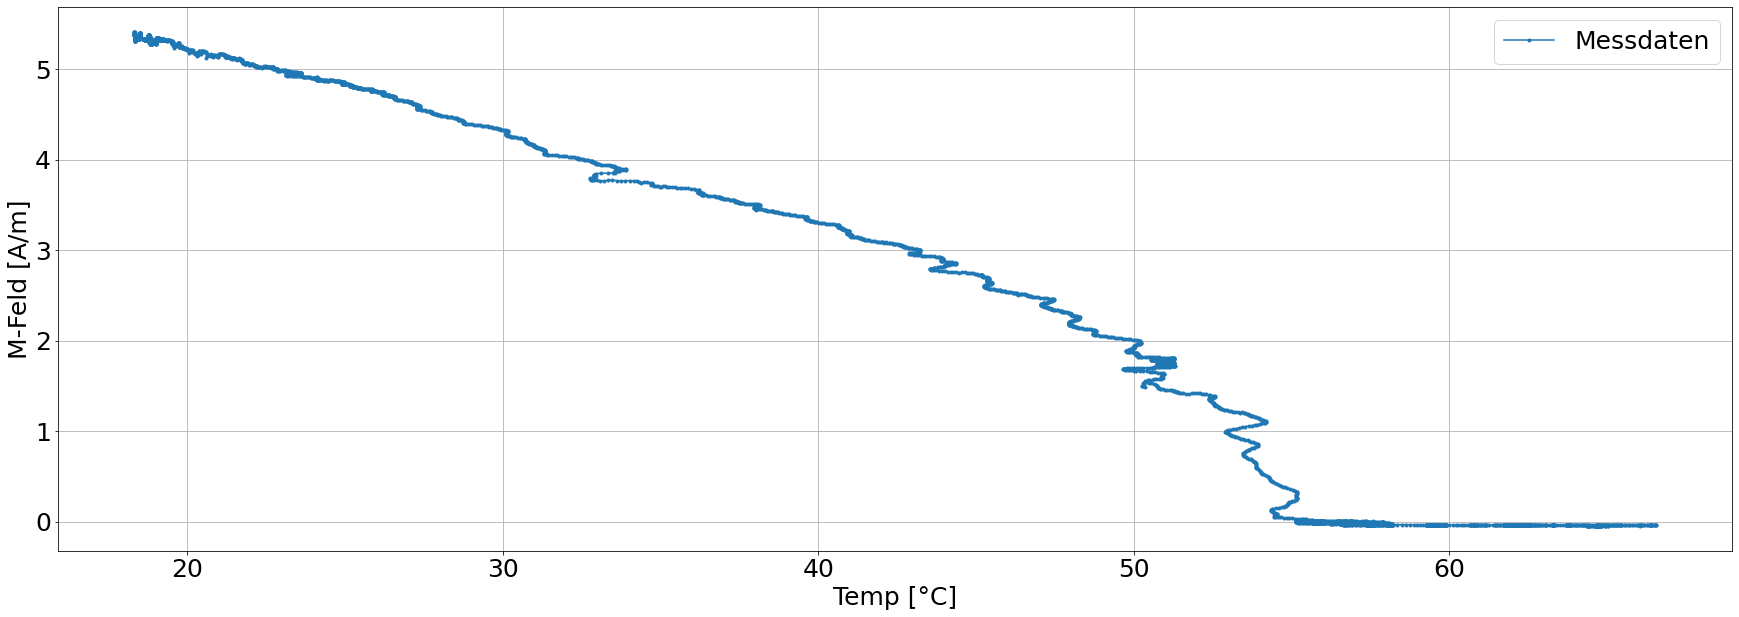

In [23]:
for name in os.listdir("Daten"):
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0])) 
        yv.append(-float(vals[1]))

    #popt,_ = curve_fit(fit_func,xv,yv)
    #print(popt)
    #plt.plot(xv,[fit_func(x,*popt) for x in xv],color="red",label="fit",linewidth=3,linestyle="-.")
    
    plt.plot(xv,yv,marker=".",label="Messdaten")
    plt.xlabel("Temp [°C]")
    plt.ylabel("M-Feld [A/m]")
    plt.legend()
    file.close()
    plt.grid(True)
    file.close()
plt.savefig("..\..\Images\Teil3.png")

In [6]:
x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]

In [9]:
min(x_ys0)

55.1403147